<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Открываем-файл-с-данными-и-изучаем-общую-информацию" data-toc-modified-id="Открываем-файл-с-данными-и-изучаем-общую-информацию-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Открываем файл с данными и изучаем общую информацию</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Регрессия-LightGBM" data-toc-modified-id="Регрессия-LightGBM-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Регрессия LightGBM</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Регрессия-LightGBM" data-toc-modified-id="Регрессия-LightGBM-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Регрессия LightGBM</a></span></li></ul></li><li><span><a href="#Итоговый-вывод" data-toc-modified-id="Итоговый-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Итоговый вывод</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

### Открываем файл с данными и изучаем общую информацию

In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

import lightgbm as lgb # импорт библиотеки LightGBM

from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# чтение файлов с данными
pth1 = '/datasets/taxi.csv'

pth1_local = 'C:/Users/Alexandra' + pth1
    
if os.path.exists(pth1):
    data = pd.read_csv(pth1, index_col=[0], parse_dates=[0]) 
    
elif os.path.exists(pth1_local):
    data = pd.read_csv(pth1_local, index_col=[0], parse_dates=[0])

else:
    print('Файлы не найдены')

In [3]:
#Выводим первые 5 строчек датафрейма на экран.
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [4]:
#Выводим основную информацию о датафрейме
data.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [5]:
# Проверяем пропущенные значения
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('YlOrRd')

,0
num_orders,0.000000


In [6]:
# Проверяем полные дубликаты
data.duplicated().sum()

26415

In [7]:
# Проверим на монотонность
data.index.is_monotonic

True

In [8]:
# Ресемплирование по одному часу
data = data.resample("1H").sum()

In [9]:
#Выводим последние 5 строчек датафрейма на экран.
data.tail()

,num_orders
datetime,
2018-08-31 19:00:00,136
2018-08-31 20:00:00,154
2018-08-31 21:00:00,159
2018-08-31 22:00:00,223
2018-08-31 23:00:00,205


**Вывод:**

В выборке **data** 26496 строк, 2 столбца. Пропусков нет. Полных дубликатов нет.


Данные с периодичностью 10 минут ресемплированы по одному часу.

## Анализ

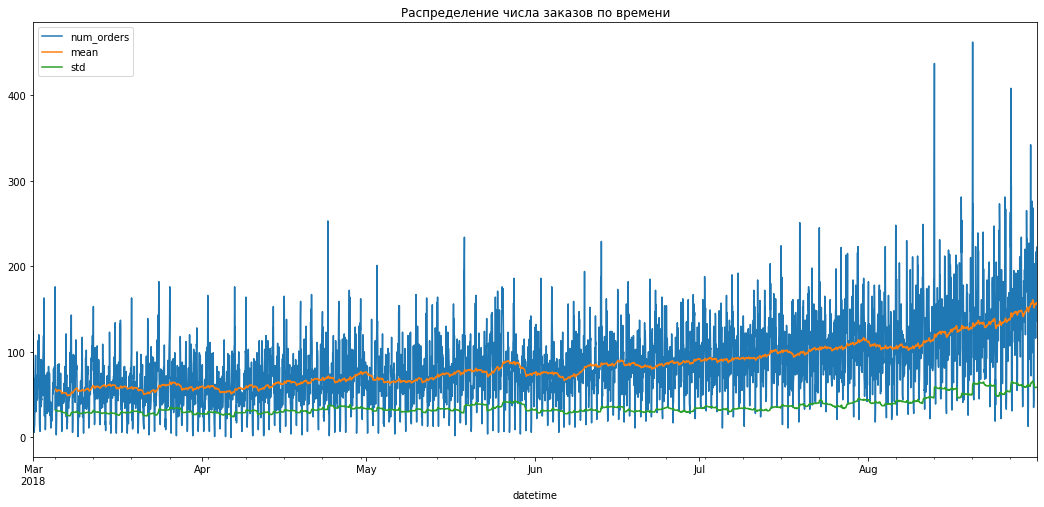

In [10]:
# Рассмотрим общий тренд
data_common = data.copy()

data_common['mean'] = data_common['num_orders'].rolling(100).mean() # скользящее среднее
data_common['std'] = data_common['num_orders'].rolling(100).std() # скользящее стандартное
data_common.plot(figsize=(18, 8), title = 'Распределение числа заказов по времени');

Распределение, среднее и стандартное отклонение изменяются. Значит, нужно проверить на стационарность. Причем к концу августа среднее значение растет.

In [11]:
# код ревьювера
from statsmodels.tsa.stattools import adfuller

ts = data['num_orders']
st_test = adfuller(ts, regression='ctt')

print('Если значение с индексом 1 меньше P-Value, заданное нами (обычно берут 0.05), то ряд стационарный')
if st_test[1] < 0.05:
    print('Наш ряд стационарный')
else:
    print('Ряд нестационарный')




Если значение с индексом 1 меньше P-Value, заданное нами (обычно берут 0.05), то ряд стационарный
Наш ряд стационарный


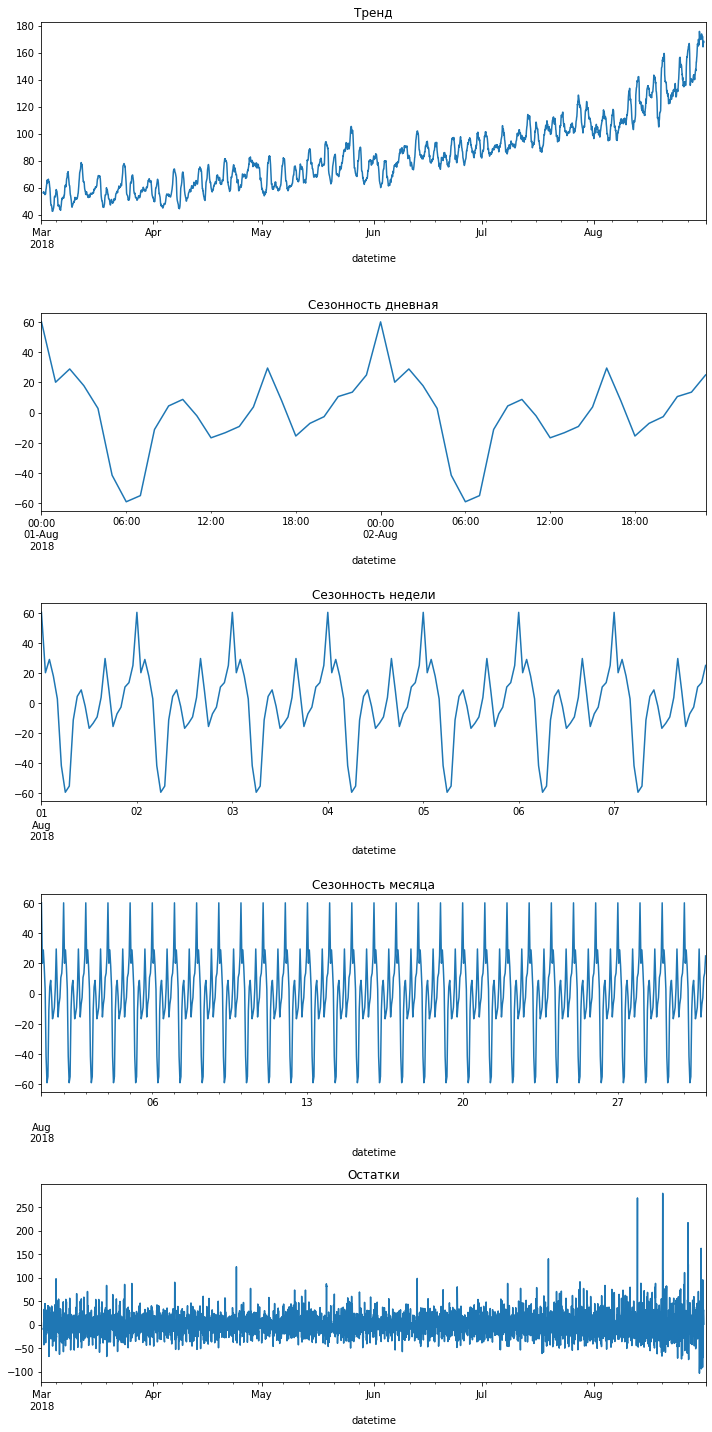

In [12]:
# Рассмотрим данные за август

decomposed = seasonal_decompose(data)
plt.figure(figsize=(10, 20))
plt.xlabel("Число заказов")
plt.subplot(511)
decomposed.trend.plot(ax=plt.gca())
plt.title('Тренд') # плавное изменение среднего значения ряда без повторяющихся закономерностей
plt.subplot(512)
decomposed.seasonal['2018-08-01':'2018-08-02'].plot(ax=plt.gca())
plt.title('Сезонность дневная') # циклично повторяющиеся закономерности во временном ряду
plt.subplot(513)
decomposed.seasonal['2018-08-01':'2018-08-07'].plot(ax=plt.gca())
plt.title('Сезонность недели') 
plt.subplot(514)
decomposed.seasonal['2018-08-01':'2018-08-30'].plot(ax=plt.gca())
plt.title('Сезонность месяца') 
plt.subplot(515)
decomposed.resid.plot(ax=plt.gca()) 
plt.title('Остатки') # компонента, которая не объясняется трендом и сезонностью - шум
plt.tight_layout()

**Вывод:**

В выборке данные за половину года с 01.03.2018 до 31.08.2018. Поэтому будем смотреть закономерности за день, неделю и месяц. Возможные причины - увеличение спроса на услуги такси.

По графику ***Тренд*** мы можем заметить, что количество заказов такси увеличивается с начала марта по конец августа.


По графику ***Сезонность дневная*** мы видим, что после 12 ночи идет спад до 6 утра, также наблюдается несколько спадов в течение дня. Минимальное число заказов приходится на 6 утра, максимальное на 12 ночи. Также высокое число заказов в вечернее время (4-5 часов вечера).


По графики ***Сезонность за неделю*** и ***Сезонность месяца*** показывают, что картина числа заказов не изменяется в зависимости от того будни это или выходные. Это происходит, потому что ресемплирование проводилось по 1 часу. Построим эти графики при ресемплировании по дням.


**Остатки** больше к концу графика. Поэтому в тестовую выборку попадет больше данных, на которых модели будет сложнее предсказывать.

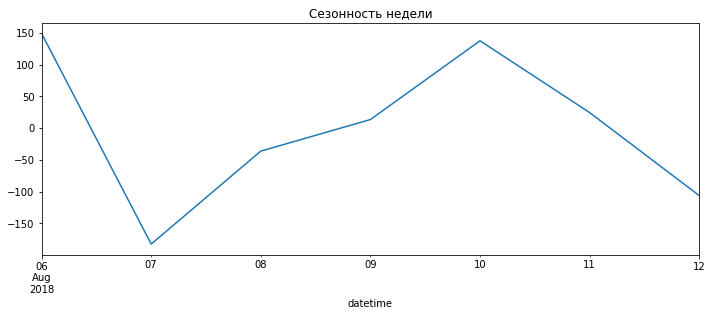

In [13]:
# Ресемплирование по дням недели
data_day_of_week =  data.copy()
data_day_of_week = data_day_of_week.resample("1D").sum()

decomposed = seasonal_decompose(data_day_of_week)
plt.figure(figsize=(10, 20))

plt.subplot(513)
decomposed.seasonal['2018-08-06':'2018-08-12'].plot(ax=plt.gca()) # 6 августа 2018 - понедельник
plt.title('Сезонность недели') 

plt.tight_layout()

**Вывод:**

При ресемплировании по дням стали видны различия в днях недели.

По графику ***Сезонность за неделю*** видно, что количество вызовов такси в разные дни меняется. Чаще всего такси берут в понедельник и пятницу. Во вторник - минимальное значение. Думаю, это связано с графиком вылета самолетов.


## Обучение

### Подготовка данных

In [14]:
# 
def make_features(data, max_lag, rolling_mean_size):
    data['hour'] = data.index.hour
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()
    
make_features(data, 168, 30)

data = data.dropna() # удаляем пропущенные значения

In [15]:
# Зададим RandomState
RANDOMSTATE = 710055

# Разбиваем выборку на обучающую и тестовую
train, test = train_test_split(data, shuffle=False, test_size=0.2)

# Выделяем из обучающей выборки валидационную
valid, test = train_test_split(test, shuffle=False, train_size=0.5)

target_train = train['num_orders']
target_valid = valid['num_orders']
target_test = test['num_orders']

features_train = train.drop('num_orders', axis=1)
features_valid = valid.drop('num_orders', axis=1) 
features_test = test.drop('num_orders', axis=1) 


In [16]:
print('Проверяем размер обучающей выборки')
print(train.shape) 
print('Проверяем размер валидационной выборки')
print(valid.shape)
print('Проверяем размер тестовой выборки')
print(test.shape)

Проверяем размер обучающей выборки
(3398, 173)
Проверяем размер валидационной выборки
(425, 173)
Проверяем размер тестовой выборки
(425, 173)


In [17]:
print('Размер обучающей выборки - {:.0%}'.format(train.shape[0] / data.shape[0]))
print('Размер валидационной выборки- {:.0%}'.format(valid.shape[0] / data.shape[0]))
print('Размер тестовой выборки- {:.0%}'.format(test.shape[0] / data.shape[0]))

Размер обучающей выборки - 80%
Размер валидационной выборки- 10%
Размер тестовой выборки- 10%


Основное условие для выбора модели - значение метрики ***RMSE*** на тестовой выборке должно быть не больше ***48***. Поэтому будем сразу при построении модели проверять ее на тестовых данных.

### Линейная регрессия

In [18]:
%%time
model = LinearRegression()

model.fit(features_train, target_train)

predictions_valid = model.predict(features_valid)


train_RMSE = mean_squared_error(target_valid, predictions_valid)**0.5


print("RMSE обучающей выборки =", train_RMSE)

RMSE обучающей выборки = 29.164562268924186
CPU times: user 267 ms, sys: 741 ms, total: 1.01 s
Wall time: 968 ms


### Дерево решений

In [19]:
%%time
#Построим модель для дерева решений

best_RMSE = 4000

best_depth = 0
best_samples_split = 2


for depth in range(2, 10):
    for samples_split in range(2,15):
    
        model = DecisionTreeRegressor(random_state=RANDOMSTATE, max_depth=depth, min_samples_split = samples_split) 
        model.fit(features_train, target_train) # обучаем модель на обучающей выборке
    
        predictions_valid = model.predict(features_valid) # предсказания модели на обучающей выборке

        train_RMSE = mean_squared_error(target_valid, predictions_valid)**0.5
        
        print("RMSE:", train_RMSE, "Глубина дерева:", depth,"min_samples_split:", samples_split)

        if train_RMSE < best_RMSE:
            best_depth = depth
            best_RMSE = train_RMSE
            best_samples_split = samples_split


print()
print("RMSE обучающей выборки =", best_RMSE, "Глубина дерева:", best_depth, "min_samples_split:", best_samples_split)

RMSE: 38.085780785778375 Глубина дерева: 2 min_samples_split: 2
RMSE: 38.085780785778375 Глубина дерева: 2 min_samples_split: 3
RMSE: 38.085780785778375 Глубина дерева: 2 min_samples_split: 4
RMSE: 38.085780785778375 Глубина дерева: 2 min_samples_split: 5
RMSE: 38.085780785778375 Глубина дерева: 2 min_samples_split: 6
RMSE: 38.085780785778375 Глубина дерева: 2 min_samples_split: 7
RMSE: 38.085780785778375 Глубина дерева: 2 min_samples_split: 8
RMSE: 38.085780785778375 Глубина дерева: 2 min_samples_split: 9
RMSE: 38.085780785778375 Глубина дерева: 2 min_samples_split: 10
RMSE: 38.085780785778375 Глубина дерева: 2 min_samples_split: 11
RMSE: 38.085780785778375 Глубина дерева: 2 min_samples_split: 12
RMSE: 38.085780785778375 Глубина дерева: 2 min_samples_split: 13
RMSE: 38.085780785778375 Глубина дерева: 2 min_samples_split: 14
RMSE: 36.958255647550594 Глубина дерева: 3 min_samples_split: 2
RMSE: 36.958255647550594 Глубина дерева: 3 min_samples_split: 3
RMSE: 36.958255647550594 Глубина де

### Случайный лес

In [20]:
%%time
#Построим модель для случайного леса

best_RMSE = 4000

best_depth = 0
best_est = 0


for est in range(19, 21):
    for depth in range(10, 20):
    
        model = RandomForestRegressor(random_state=RANDOMSTATE, n_estimators=est, max_depth=depth) 
        model.fit(features_train, target_train) # обучаем модель на обучающей выборке
    
        predictions_valid = model.predict(features_valid) # предсказания модели на обучающей выборке
      
        train_RMSE = mean_squared_error(target_valid, predictions_valid)**0.5

        print("RMSE:", train_RMSE, "Количество деревьев:", est, "Глубина дерева:", depth)

        if train_RMSE < best_RMSE:
            best_depth = depth
            best_RMSE = train_RMSE
            best_est = est

print()

print("RMSE обучающей выборки =", best_RMSE, "Количество деревьев:", best_est,  "Глубина дерева:", best_depth)

RMSE: 31.452822370467267 Количество деревьев: 19 Глубина дерева: 10
RMSE: 31.691717060525892 Количество деревьев: 19 Глубина дерева: 11
RMSE: 31.731828610393773 Количество деревьев: 19 Глубина дерева: 12
RMSE: 31.42941665196753 Количество деревьев: 19 Глубина дерева: 13
RMSE: 31.16135092912565 Количество деревьев: 19 Глубина дерева: 14
RMSE: 31.31570244634078 Количество деревьев: 19 Глубина дерева: 15
RMSE: 31.32630731648348 Количество деревьев: 19 Глубина дерева: 16
RMSE: 31.51949556700753 Количество деревьев: 19 Глубина дерева: 17
RMSE: 31.665941383239183 Количество деревьев: 19 Глубина дерева: 18
RMSE: 30.994271401906737 Количество деревьев: 19 Глубина дерева: 19
RMSE: 31.351050463246114 Количество деревьев: 20 Глубина дерева: 10
RMSE: 31.538288501325425 Количество деревьев: 20 Глубина дерева: 11
RMSE: 31.635817952296463 Количество деревьев: 20 Глубина дерева: 12
RMSE: 31.29986166417268 Количество деревьев: 20 Глубина дерева: 13
RMSE: 31.01468682598925 Количество деревьев: 20 Глубин

### Регрессия LightGBM

In [21]:
%%time
#Построим модель для регрессии LightGBM
best_RMSE = 4000
best_depth = 0
best_leaves = 0

for depth in range(3, 8, 2):
    for leaves in range(40, 43):
        model = lgb.LGBMRegressor(num_leaves = leaves,
                                  max_depth = depth,
                                  random_state=RANDOMSTATE,
                                  metric='rmse',
                                  task='train', 
                                  objective='regression',
                                  learning_rate=0.2,
                                  verbose=-1)


        model.fit(features_train, target_train)
    
        predictions_valid = model.predict(features_valid) # предсказания модели на обучающей выборке
      
        train_RMSE = mean_squared_error(target_valid, predictions_valid)**0.5
        
        print("RMSE:", train_RMSE,  "Количество листьев:", leaves,  "Глубина дерева:", depth)

        if train_RMSE < best_RMSE:
            best_depth = depth
            best_RMSE = train_RMSE
            best_leaves = leaves


print()

print("RMSE обучающей выборки =", best_RMSE, "Количество листьев:", best_leaves,  "Глубина дерева:", best_depth)

RMSE: 30.65777291935929 Количество листьев: 40 Глубина дерева: 3
RMSE: 30.65777291935929 Количество листьев: 41 Глубина дерева: 3
RMSE: 30.65777291935929 Количество листьев: 42 Глубина дерева: 3
RMSE: 30.800803581878068 Количество листьев: 40 Глубина дерева: 5
RMSE: 30.800803581878068 Количество листьев: 41 Глубина дерева: 5
RMSE: 30.800803581878068 Количество листьев: 42 Глубина дерева: 5
RMSE: 29.801223708244944 Количество листьев: 40 Глубина дерева: 7
RMSE: 30.692410150418592 Количество листьев: 41 Глубина дерева: 7
RMSE: 31.015796192757513 Количество листьев: 42 Глубина дерева: 7

RMSE обучающей выборки = 29.801223708244944 Количество листьев: 40 Глубина дерева: 7
CPU times: user 1min 42s, sys: 1.18 s, total: 1min 43s
Wall time: 1min 43s


**Вывод:**

Выведем результаты обучающей выборки RMSE для исследуемых моделей:


| |Линейная регрессия|Дерево решений  	|Случайный лес  	| LightGBM|    
|:---	|:---:	|:---:	|:---:	|:---:	|
|RMSE обучающей выборки	|29.164562268924186 	|34.927772013283594	|30.930063563015853 |  29.801223708244944|
|Время 	|968 ms|20 s|1min 39s  | 1min 43s|

Наилучшее значение RMSE тестовой выборки у модели ***Линейная регрессия***(29.164562268924186).Эта модель самая быстрая.

Дерево решений показало самое большое значение RMSE

## Тестирование

Сравним тестовые данные с предсказанными данными для выборок, которые нам подошли по RMSE.

### Линейная регрессия

RMSE тестовой выборки = 34.60464072420712


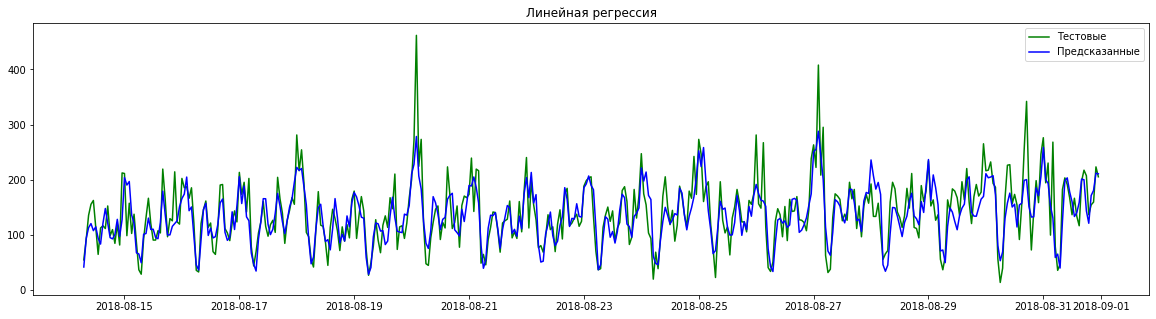

In [22]:
model = LinearRegression()
model.fit(features_train, target_train)

pred_test = model.predict(features_test)
test_RMSE = mean_squared_error(target_test, pred_test)**0.5

print("RMSE тестовой выборки =", test_RMSE)

plt.figure(figsize=(20,5))

plt.plot(target_test.index, 
         target_test, 
         'g-', 
         target_test.index, 
         pred_test,
         'b-')
plt.legend(['Тестовые', 'Предсказанные'])
plt.title('Линейная регрессия');

### Дерево решений

RMSE тестовой выборки = 52.21352456428108


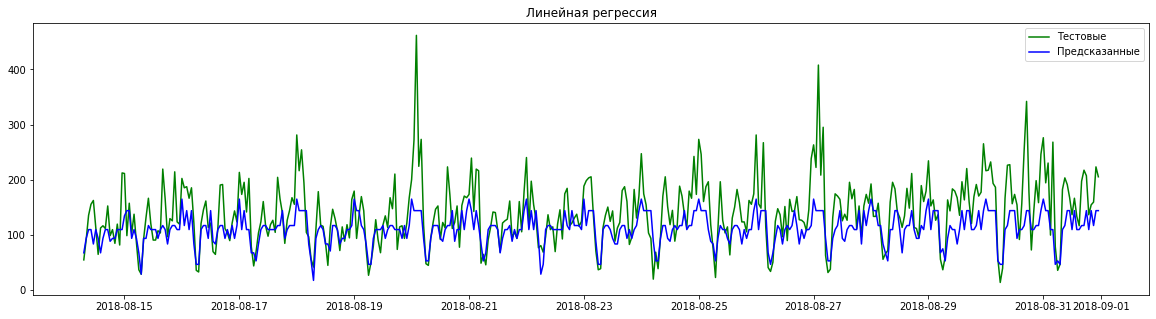

In [23]:
model = DecisionTreeRegressor(random_state=RANDOMSTATE, max_depth=4, min_samples_split = 2) 
model.fit(features_train, target_train)

pred_test = model.predict(features_test)
test_RMSE = mean_squared_error(target_test, pred_test)**0.5

print("RMSE тестовой выборки =", test_RMSE)

plt.figure(figsize=(20,5))
plt.plot(target_test.index, 
         target_test, 
         'g-', 
         target_test.index, 
         pred_test,
         'b-')
plt.legend(['Тестовые', 'Предсказанные'])
plt.title('Линейная регрессия');

### Случайный лес

RMSE тестовой выборки = 43.9773797178324


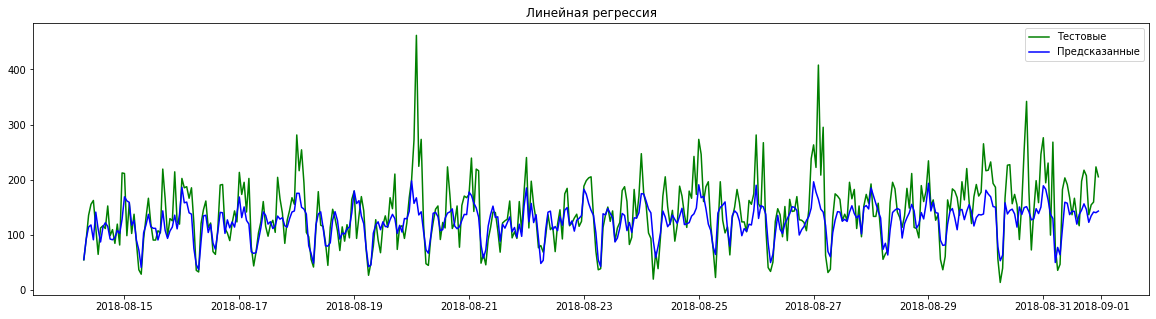

In [24]:
model = RandomForestRegressor(random_state=RANDOMSTATE, n_estimators=30, max_depth=19) 
model.fit(features_train, target_train)

pred_test = model.predict(features_test)
test_RMSE = mean_squared_error(target_test, pred_test)**0.5

print("RMSE тестовой выборки =", test_RMSE)

plt.figure(figsize=(20,5))
plt.plot(target_test.index, 
         target_test, 
         'g-', 
         target_test.index, 
         pred_test,
         'b-')
plt.legend(['Тестовые', 'Предсказанные'])
plt.title('Линейная регрессия');

### Регрессия LightGBM

RMSE тестовой выборки = 42.394742261987126


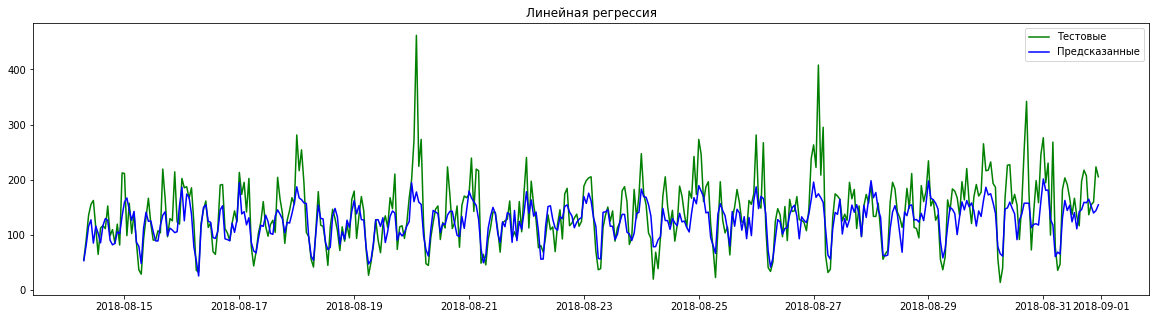

In [25]:
model = lgb.LGBMRegressor(num_leaves = 40,
                            max_depth = 7,
                            random_state=RANDOMSTATE,
                            metric='rmse',
                            task='train', 
                            objective='regression',
                            learning_rate=0.2,
                            verbose=-1)
model.fit(features_train, target_train)

pred_test = model.predict(features_test)
test_RMSE = mean_squared_error(target_test, pred_test)**0.5

print("RMSE тестовой выборки =", test_RMSE)

plt.figure(figsize=(20,5))
plt.plot(target_test.index, 
         target_test, 
         'g-', 
         target_test.index, 
         pred_test,
         'b-')
plt.legend(['Тестовые', 'Предсказанные'])
plt.title('Линейная регрессия');

**Вывод:**

Выведем результаты RMSE тестовых выборок обученных моделей:


| |Линейная регрессия|Дерево решений  	|Случайный лес  	| LightGBM|    
|:---	|:---:	|:---:	|:---:	|:---:	|
|RMSE обучающей выборки	|29.164562268924186 	|34.927772013283594	|30.930063563015853 |  29.801223708244944|
|RMSE тестовой выборки 	|34.60464072420712|52.21352456428108|43.9773797178324 | 42.394742261987126|

Наилучшее значение RMSE тестовой выборки у модели ***Линейная регрессия***(34.60464072420712).Эта модель показала лучшие результаты.

Дерево решений показало самое большое значение RMSE тестовой выборки, которое не соответствует техническому заданию.

Графики показывают, что построенные модели хорошо предсказывают пиковые значения. Минимумы предсказывают точнее.

## Итоговый вывод

При исследовании данных обнаружили, что в выборке data 26496 строк. Пропусков нет. Полных дубликатов нет.

Данные с периодичностью 10 минут ресемплированы по одному часу.

Проанализировав графики пришли к выводу:

В выборке данные за половину года с 01.03.2018 до 31.08.2018. Поэтому будем смотреть закономерности за день, неделю и месяц. Возможные причины - увеличение спроса на услуги такси.

По графику ***Тренд*** мы можем заметить, что количество заказов такси увеличивается с начала марта по конец августа.

По графику ***Сезонность дневная*** мы видим, что после 12 ночи идет спад до 6 утра, также наблюдается несколько спадов в течение дня. Минимальное число заказов приходится на 6 утра, максимальное на 12 ночи. Также высокое число заказов в вечернее время (4-5 часов вечера).

При ресемплировании по дням стали видны различия в днях недели.

По графику **Сезонность за неделю** видно, что количество вызовов такси в разные дни меняется. Чаще всего такси берут в понедельник и пятницу. Во вторник - минимальное значение. Думаю, это связано с графиком вылета самолетов.

Исследуемые модели:
- Линейная регрессия
- Дерево решений
- Случайный лес
- Регрессия LightGBM

Только модель ***Дерево решений*** показала RMSE тестовой выборки > 48 (52.21352456428108). Эта модель нам не подходит.

Наилучшее значение RMSE тестовой выборки у модели ***Линейная регрессия***(34.60464072420712).Эта модель также самая быстрая.

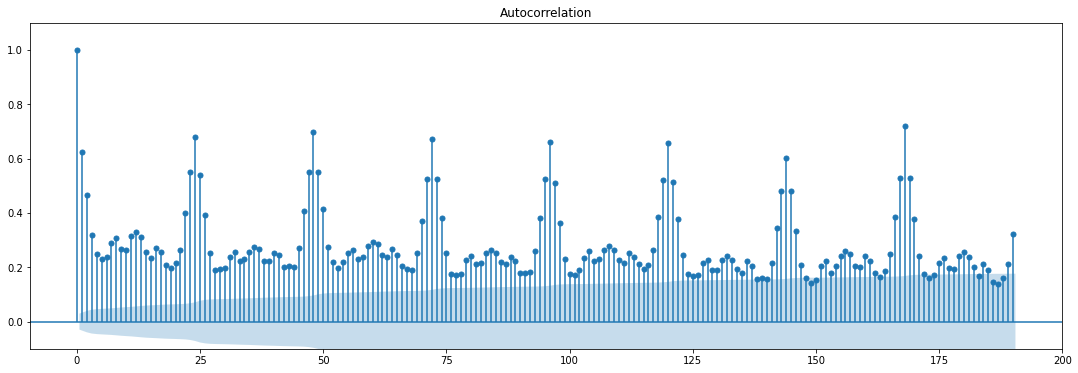

In [26]:
# Код ревьюера
from statsmodels.graphics import tsaplots

taxi = pd.read_csv("/datasets/taxi.csv", index_col=[0], parse_dates=[0]).resample('1H').sum()
ts = taxi['num_orders']

fig = tsaplots.plot_acf(ts,lags= 190)
fig.set_size_inches(18.5, 6)
plt.ylim(-.1, 1.1)
plt.show() 
